<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab5_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Value-Function Approximation


## Exercise 1 SGD
Many real-world processes can be modeled as nonlinear relationships, and SGD is a standard tool to fit those models from data.  

**Example: Predicting energy consumption in a building**  
- Energy usage depends on **temperature**, **time of day**, and **occupancy**.  
- If you plot the data, the relationship might not be linear — it curves.  
- A simple way to approximate this nonlinear relation is to fit a **polynomial function** of temperature (or time).  

Now, imagine you’re collecting data continuously:  
- You get one data point (temperature, usage) at a time.  
- Instead of waiting to collect all data and computing a full batch update, you update your model incrementally with **SGD**.  
- This makes your learning **online, adaptive, and scalable** — just like in reinforcement learning.  

---

In this exercise, approximating a cubic polynomial is a simplified version of **predicting a nonlinear real-world phenomenon**.


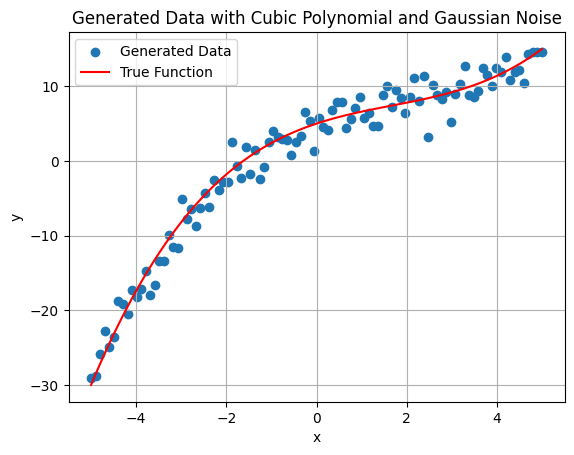

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data based on a cubic polynomial with Gaussian noise
np.random.seed(42)  # for reproducibility
n_samples = 100
x = np.linspace(-5, 5, n_samples)
# Define the true cubic polynomial function
def true_function(x):
  return 0.1 * x**3 - 0.5 * x**2 + 2 * x + 5

y_true = true_function(x)
noise = np.random.normal(0, 2, n_samples)  # Gaussian noise with mean 0 and std dev 2
y = y_true + noise

# Optional: Plot the generated data
plt.scatter(x, y, label='Generated Data')
plt.plot(x, y_true, color='red', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with Cubic Polynomial and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()

Based on the given a dataset of input–output pairs `(x, y)` where the underlying relationship is approximately polynomial.  

a. Use a **linear model with polynomial features**: Write a function that takes an input `x` and a weight vector `w`, and return the predicted value y_hat.    
   
   - y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3  

   where w0, w1, w2, w3 are the parameters to be learned.

b. **Loss function (Mean Squared Error)**:
   Write a function that computes the loss for one training point `(x, y)`:

     - Formula: `loss = 0.5 * (y - y_hat)**2`

c. **SGD update**:   Derive the gradient of the loss with respect to each parameter (w0, w1, w2, w3).  
   - Write a function:  

     ```python
     def sgd_update(x, y, w, alpha):
         """
         Perform one SGD update for a single training example.
         Input:
             x (float) - input value
             y (float) - true output
             w (np.array) - current weights
             alpha (float) - learning rate
         Output:
             w (np.array) - updated weights
         """
         # TODO: compute prediction, gradient, and update weights
         return w
     ```
d. **Training loop**:
   - Loop over the dataset.  
   - At each step, update the weights using `sgd_update`.  
   - Track the training loss after each iteration.  

e. **Comparison with different learning rates**  
   - Train your model using at least three different learning rates, for example:  
     - alpha = 0.001  
     - alpha = 0.01  
     - alpha = 0.1  
   - Plot training loss vs iteration for each learning rate.  
   - Plot the final fitted polynomial curves for each learning rate on the same graph with the true dataset.

---

### Deliverables
- Code for `predict`, `mse_loss`, and `sgd_update`.  
- Training loop that runs with multiple learning rates.  
- Plot of training loss vs iteration for each learning rate.  
- Plot of the fitted polynomial vs dataset for each learning rate.  
- A short discussion:
  - How does the learning rate affect convergence speed and stability?  
  - Which learning rate gives the best balance between speed and accuracy?  

Loss:  [2.89669814e-02 4.24884662e-01 2.83709083e-01 3.38776370e+00
 3.33291281e-01 2.63172142e-01 4.46458465e+00 1.04792797e+00
 4.48237138e-01 6.64476014e-01 3.09886635e-01 2.61777607e-01
 2.86227720e-01 6.09886465e+00 4.67512489e+00 2.29755954e-01
 1.16663097e+00 6.90265481e-01 7.49527586e-01 2.39959093e+00
 6.49613663e+00 3.32931648e-02 3.85682587e-01 2.15359474e+00
 4.10101130e-02 5.51142790e-01 1.05235007e+00 1.31766498e+00
 4.83346084e-02 5.21882986e-02 4.00630291e-02 1.07492572e+01
 4.18405503e-01 6.79749167e-01 3.38075390e+00 1.09903096e+00
 9.50750025e-01 4.37401226e+00 1.43814184e+00 9.13069212e-01
 2.95312962e+00 8.32548254e-01 2.51559975e-01 5.44766256e-02
 2.06913953e+00 1.39165318e-01 2.17721044e-04 4.50588729e+00
 1.21890362e+00 3.55488664e+00 1.11395290e+00 1.70370405e-03
 1.46796379e-01 2.03670143e+00 4.03094579e+00 3.43726983e+00
 4.39331012e-01 5.41519300e-03 9.33331803e-01 3.47409647e+00
 4.27552805e-02 3.80078412e-02 1.25522992e+00 1.58921620e+00
 2.45591042e+00 5

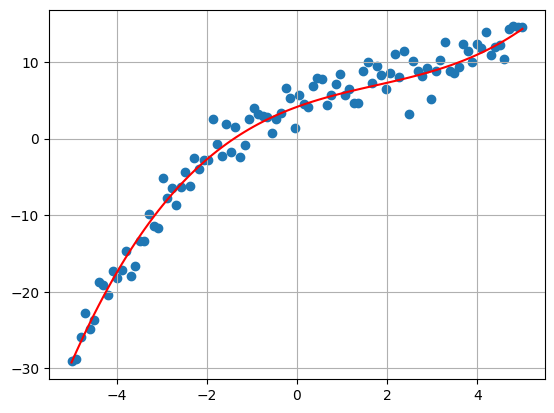

In [11]:
import matplotlib.pyplot as plt
#- y_hat(x; w) = w0 + w1 * x + w2 * x^2 + w3 * x^3 

# a) cubic "linear-in-parameters" model: y_hat = w0 + w1*x + w2*x^2 + w3*x^3
def y_hat(x, w):
    x1 = x
    x2 = x * x
    x3 = x2 * x
    return w[0] + w[1]*x1 + w[2]*x2 + w[3]*x3


# b) loss for one (x, y): 0.5 * (y - y_hat)**2
def mse_one(x, y, w):
    err = y - y_hat(x, w)
    loss = 0.5 * err**2
    return loss


# c) single-sample SGD update for (w0, w1, w2, w3)
#    gradient: dL/dw = -(y - y_hat) * [1, x, x^2, x^3]
def sgd_update(x, y, w, alpha):
    
    # features for cubic polynomial
    y_pred =  y_hat(x, w)
    err = y_pred - y
    
    # feature vector phi = [1, x, x^2, x^3]
    phi = np.array([1.0, x, x**2, x**3], dtype=float)
    
    grad = err * phi                  # delta_L/delta_w
    w = w - alpha * grad               # gradient step
    return w


w = np.zeros(4, dtype=float)
alpha = 0.0001
n_epochs = 500

for epoch in range(n_epochs):
    for x_i, y_i in zip(x, y):        # iterate samples
        w = sgd_update(x_i, y_i, w, alpha)

print("Loss: ", mse_one(x, y, w))
print("[WEIGTS]: ", w)
plt.grid()
plt.scatter(x,y)
plt.plot(x,y_hat(x,w), color='red')

# plt.figure()
# plt.plot(mse_one(x, y, w))
# plt.grid()

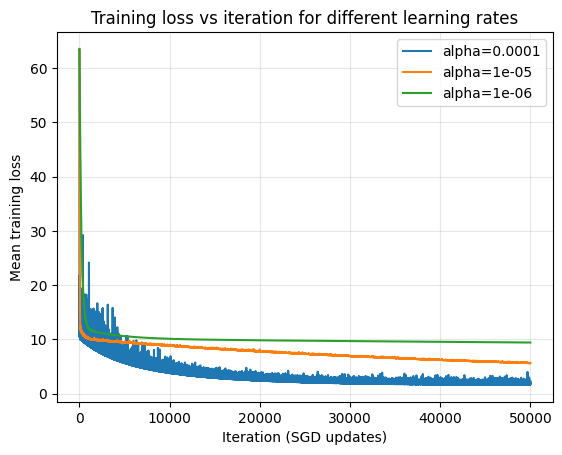

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mse_mean_dataset(x_all, y_all, w):
    return 0.5 * np.mean((y_all - y_hat(x_all, w))**2)

# Use three distinct alphas
alphas = [0.0001, 0.00001, 0.000001]
n_epochs = 500
N = len(x)

loss_curves = []

for alpha in alphas:
    w = np.zeros(4, dtype=float)
    losses = []
    for _ in range(n_epochs):
        for i in np.random.permutation(N):
            w = sgd_update(x[i], y[i], w, alpha)
            losses.append(mse_mean_dataset(x, y, w))
    loss_curves.append(losses)

# Plot
plt.figure()
for a, curve in zip(alphas, loss_curves):
    plt.plot(range(1, len(curve)+1), curve, label=f'alpha={a:g}')
plt.xlabel("Iteration (SGD updates)")
plt.ylabel("Mean training loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Training loss vs iteration for different learning rates")
plt.show()


## How does the learning rate affect convergence speed and stability?  
Even though the problem is small, the learning rate affect a lot the system specially in stability, if the alpha is smaller than 0.0001 the accuracy decrease and the converge as well. 

## Which learning rate gives the best balance between speed and accuracy? 
As it was mentioned in the previous answer the best learning rate (alpha) 0.0001. In the graphic above it shows how it goes closed to zero compared with the others. 

## Exercise 2: 1000-State Random Walk with Semi-Gradient TD(0)

We will study the 1,000-state Random Walk a classic reinforcement learning benchmark from Sutton & Barto.  

- The environment has states numbered **1 to 1000**.  
- There are two **terminal states**:  
  - State `0` on the left (reward = 0)  
  - State `1001` on the right (reward = 1)  
- Each episode starts in the **middle** at state `500`.  
- At each step, the agent moves **left or right with equal probability (0.5 each)**.  
- The episode ends when the agent reaches either terminal.  
- Discount factor: **γ = 1.0** (episodic task).  


### Function Approximation
Instead of storing a separate value for each state, approximate the value function with a **linear function of the state index**: V_hat(s; w0, w1) = w0 + w1 * s



---

## Instructions
1. **Implement the environment**:  
   - You may **use AI tools such as ChatGPT** to generate the environment code (states, transitions, rewards).  
   - Make sure you understand how the environment works.  

2. **Implement the TD(0) update manually**:  
   - Do **not** use AI for this part.  
   - You must write the gradient update equations yourself using the formulas above.  

3. **Train your agent**:  
   - Run several episodes (e.g., 1000 episodes).  
   - Experiment with different step sizes (`alpha`).  

4. **Evaluate**:  
   - Plot the **true value function** `V*(s) = s/1001`.  
   - Plot your **learned approximation line** after training.  
   - Discuss whether the line captures the overall trend of the true values.  

---


## Guidelines on Using AI Tools
- You are encouraged to use AI tools (e.g., ChatGPT, Gemini, Copilot) to **generate helper code**, such as:  
  - Building the random walk environment (`reset`, `step`).  
  - Implementing the feature map φ(s).  
  - Plotting results.  
- However, **do not use AI tools to generate the TD(0) update equation**.  
  - Deriving and implementing the update is the key learning objective of this exercise.  
  - If we find code that uses an AI-generated update without understanding, the score will be zero.  


## Deliverables
- Python code for the environment and the TD(0) algorithm.  
- Plot the **true value function**: For state `s`, the probability of reaching the right terminal is:  
  `V*(s) = s / 1001`
- Plot comparing the true value function and the approximated line.  
- A short discussion:  
  - How does the approximation behave for small vs large states?  
  - How does the learning rate affect convergence?  

---

## Hints
- Normalize states to `[0,1]` before using them in the line approximation to avoid very large values for w1.  
- Start with small step sizes (e.g., 0.001–0.01).  
- The approximation will not be perfect (a line cannot match the true curve), but should capture the increasing trend.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


L = 0 
R = 1001
START = 500

def reset():
    return START

def step(s):
    """Move left/right by exactly 1. Left terminal reward=0, Right terminal reward=+1."""
    move = -1 if np.random.rand() < 0.5 else 1
    s_next = s + move
    done = (s_next == L) or (s_next == R)
    r = 1.0 if (done and s_next == R) else 0.0
    return s_next, r, done

# Linear value approximation
def phi(s):
    return np.array([1.0, s/1001.0], dtype=float)  # normalized to [0,1]

def V_hat(s, w):
    return float(np.dot(phi(s), w))

def train_td0(n_epochs=1000, alpha=0.01, gamma=1.0, seed=0):
    np.random.seed(seed)
    w = np.zeros(2, dtype=float)   # [w0, w1]

    for _ in range(n_epochs):
        s = reset()
        done = False

        while not done:
            s_next, r, done = step(s)
            # TD(0) update 
            v_s     = V_hat(s, w)
            v_snext = 0.0 if done else V_hat(s_next, w)
            delta   = r + gamma * v_snext - v_s
            w = w + alpha * delta * phi(s)
            s = reset() if done else s_next
    return w

N_EPOCHS = 1000
ALPHA    = 0.1

w = train_td0(n_epochs=N_EPOCHS, alpha=ALPHA, seed=42)
print("Learned weights (w0, w1):", w)

S = np.arange(1, 1001)
V_learn = w[0] + w[1]*(S/1001.0)

V_star = S/1001.0

plt.plot(S, V_star, label="V*(s)=s/1001")
plt.plot(S, V_learn, "--", label="Learned linear approx (TD(0))")
plt.xlabel("State s")
plt.ylabel("Value")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# A short discussion:  
  - How does the approximation behave for small vs large states?  
    * For small steps (episodes) it will not converge, so it is neccesary to balance the episodes with the learning rate
    * On the other hand, if the steps are large it will converge, close to the endpoint line, but it will take more time.
  - How does the learning rate affect convergence? 
    * The systems is sensible to changes of 0.001, so it the learning rate affect it accuracy for the estimation, but in time/speed looks the same. 

# Exercise 3: Solving MountainCar with Tile Coding and SARSA

## Problem Description
In this exercise, you will solve the **MountainCar-v0** environment from Gym using **tile coding** for function approximation and the **SARSA algorithm** for learning.  

The **Mountain Car problem**:
- A car is stuck in a valley and is too weak to drive straight up to the goal.  
- It must build momentum by going back and forth until it can reach the goal at `position >= 0.5`.  
- **State space**: continuous (position, velocity).  
- **Actions**: {0: push left, 1: no push, 2: push right}.  
- **Reward**: -1 per step until the goal is reached.  
- **Episode ends**: when the car reaches the goal or after 200 steps.  

---

## Step 1: Environment and Random Policy (with AI help)
- Use an **AI tool (e.g., ChatGPT)** to generate starter code for:
  - Creating the Gym environment (`MountainCar-v0`).  
  - Running a **random policy** (actions chosen randomly).  
- Run this code to confirm you can interact with the environment and see episode returns.  
- This will serve as a **baseline**.  
- **Important**: Do not use AI to implement the learning algorithm.  

---

## Step 2: SARSA Algorithm with Function Approximation
Implement **SARSA (on-policy TD control)** with the following steps:

For each episode:
1. Initialize state `s`.  
2. Choose action `a` using **ε-greedy** based on Q(s,a).  
3. For each step:  
   - Take action `a`, observe `(s_next, r, done)`.  
   - Choose next action `a_next` using ε-greedy from `s_next`.  
   - Compute TD target:  
     ```
     target = r + gamma * Q(s_next, a_next)
     ```  
     (if `s_next` is terminal, then target = r).  
   - Compute TD error:  
     ```
     delta = target - Q(s,a)
     ```  
   - Update weights:  
     ```
     w <- w + alpha * delta * x(s,a)
     ```  
   - Update `s = s_next`, `a = a_next`.  
4. End episode when the goal is reached or step limit is hit.  

---

## Step 3: Experiments
- Train the agent for 500–1000 episodes.  
- Plot **episode returns (sum of rewards)** vs episodes.  
- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?  
  - How many steps does it typically take?  

---

## Deliverables
- Python code for tile coding and SARSA.  
- Plot of returns vs episodes.  
- Plot the Value function
- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).


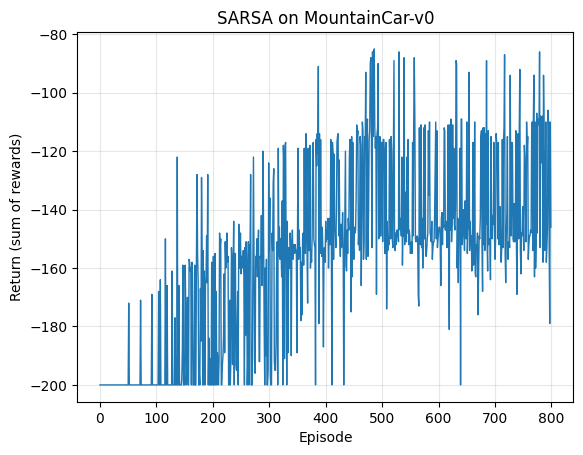

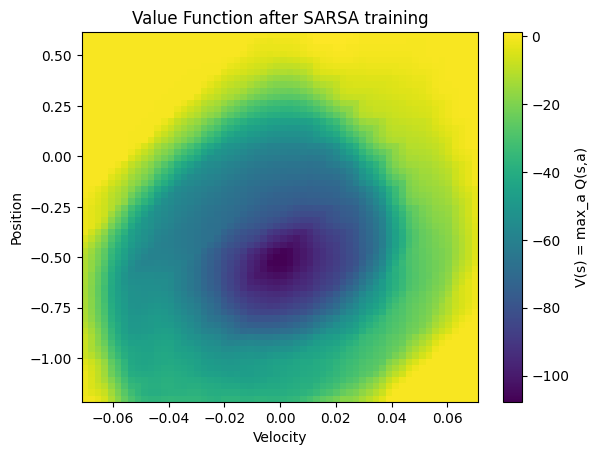

In [38]:
# You can use the following code for tiling

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

class TileCoderXY:
    """
    A TileCoder for function approximation that applies tile coding on the x and y coordinates
    of a 3D state. Instead of providing tile widths, the user provides the number of tiles per
    dimension. The tile widths are computed based on the state bounds and the number of tiles.
    The z coordinate is not used.
    """

    def __init__(self, num_tilings, tiles_per_dim, state_low, state_high):
        """
        Initialize the TileCoderXY.

        Parameters:
            num_tilings (int): Number of overlapping tilings.
            tiles_per_dim (array-like of 2 ints): Number of tiles along the x and y dimensions.
            state_low (array-like of 2 floats): Lower bounds for the x and y dimensions.
            state_high (array-like of 2 floats): Upper bounds for the x and y dimensions.
        """
        self.num_tilings = num_tilings
        self.tiles_per_dim = np.array(tiles_per_dim, dtype=int)
        self.state_low = np.array(state_low, dtype=float)
        self.state_high = np.array(state_high, dtype=float)

        # Compute the tile width for each dimension.
        # We assume that the grid spans exactly from state_low to state_high.
        # When there are N tiles, there are N-1 intervals between the boundaries.
        self.tile_width = (self.state_high - self.state_low) / (self.tiles_per_dim - 1)

        # Precompute an offset for each tiling to create overlapping grids.
        # self.offsets = [(i / self.num_tilings) * self.tile_width for i in range(self.num_tilings)]
        # self.offsets = self.compute_8_offsets()
        # self.offsets = np.stack(self._compute_offsets(), axis=0)  # shape: (num_tilings, dims)
        # Precompute offsets for each tiling.
        # For tiling i:
        #   offset_x = (((i + 0) % num_tilings) / num_tilings) * tile_width[0]
        #   offset_y = (((i + 1) % num_tilings) / num_tilings) * tile_width[1]
        offsets = np.empty((self.num_tilings, 2))
        for i in range(self.num_tilings):
            offsets[i, 0] = (((i + 0) % self.num_tilings) / self.num_tilings) * self.tile_width[0]
            offsets[i, 1] = (((i + 1) % self.num_tilings) / self.num_tilings) * self.tile_width[1]
        self.offsets = offsets


        # Precompute multiplier for flattening a 2D index.
        # For grid shape (N, M), flat index = x_index * M + y_index.
        self.multiplier = self.tiles_per_dim[1]

        # Initialize a weight vector for each tiling.
        num_tiles = np.prod(self.tiles_per_dim)
        self.weights = [np.zeros(num_tiles) for _ in range(self.num_tilings)]

    def save(self, file_name):
        np.savez(file_name + ".npz", weights=self.weights)

    def load(self, file_name):
        self.weights = np.load(file_name+".npz")["weights"]


    def compute_8_offsets(self):
        """
        Compute a list of offsets using a combination of cardinal and diagonal directions.
        The offsets include:
          - Center: [0, 0]
          - Cardinal: right, left, up, down (half-tile shifts)
          - Diagonal: up-right, up-left, down-right, down-left (half-tile shifts)

        If the number of tilings exceeds the number of unique offsets (9), the list is repeated.

        Returns:
            List of 2-element numpy arrays representing the offset for each tiling.
        """
        half_tile = self.tile_width / 8.0
        base_offsets = [
            np.array([0.0, 0.0]),  # Center (no shift)
            np.array([half_tile[0], 0.0]),  # Right
            np.array([-half_tile[0], 0.0]),  # Left
            np.array([0.0, half_tile[1]]),  # Up
            np.array([0.0, -half_tile[1]]),  # Down
            np.array([half_tile[0], half_tile[1]]),  # Up-right
            np.array([-half_tile[0], half_tile[1]]),  # Up-left
            np.array([half_tile[0], -half_tile[1]]),  # Down-right
            np.array([-half_tile[0], -half_tile[1]])  # Down-left
        ]
        offsets = []
        for i in range(self.num_tilings):
            offsets.append(base_offsets[i % len(base_offsets)])
        return offsets

    def get_tile_indices(self, state):
        """
        Compute the active tile indices for all tilings given a 2D state.

        Parameters:
            state (array-like of length 2): The input state [x, y].

        Returns:
            List of tuples (tiling_index, flat_tile_index) for each tiling.
        """
        state = np.array(state, dtype=float)  # shape: (2,)
        # Compute shifted states for all tilings in one vectorized operation.
        # Shape of shifted: (num_tilings, 2)
        shifted = (state - self.state_low) + self.offsets

        # Compute tile coordinates (integer indices) for each tiling.
        # Division is broadcasted over the offsets.
        tile_coords = (shifted / self.tile_width).astype(int)  # shape: (num_tilings, 2)

        # Clip to ensure indices are within bounds.
        tile_coords[:, 0] = np.clip(tile_coords[:, 0], 0, self.tiles_per_dim[0] - 1)
        tile_coords[:, 1] = np.clip(tile_coords[:, 1], 0, self.tiles_per_dim[1] - 1)

        # Compute flat indices for each tiling.
        # flat_index = x_index * (tiles_per_dim[1]) + y_index
        flat_indices = tile_coords[:, 0] * self.tiles_per_dim[1] + tile_coords[:, 1]

        # Return a list of (tiling_index, flat_index) tuples.
        return list(zip(range(self.num_tilings), flat_indices))


    def predict(self, state):
        """
        Compute the approximated function value for a given 3D state using tile coding on x and y.

        Parameters:
            state (array-like): The input state [x, y, z].

        Returns:
            float: The function approximation (sum of weights for the active tiles).
        """
        active_tiles = self.get_tile_indices(state)
        return sum(self.weights[tiling][idx] for tiling, idx in active_tiles)

    def update(self, state, target, alpha):
        """
        Update the weights given a state and target value.

        Parameters:
            state (array-like): The input state [x, y, z].
            target (float): The target function value.
            alpha (float): The overall learning rate.
        """
        prediction = self.predict(state)
        error = target - prediction
        # Distribute the learning rate equally among all tilings.
        alpha_per_tiling = alpha / self.num_tilings

        active_tiles = self.get_tile_indices(state)
        for tiling, idx in active_tiles:
            self.weights[tiling][idx] += alpha_per_tiling * error
            

# --- Environment ---
#env = gym.make("MountainCar-v0", render_mode="human")
env = gym.make("MountainCar-v0")
nA = env.action_space.n  # 3 actions

# state bounds (position, velocity)
state_low  = env.observation_space.low[:2]
state_high = env.observation_space.high[:2]

# --- Function Approximation: one TileCoderXY per action ---
num_tilings   = 15
tiles_per_dim = (10, 10)

approximators = [
    TileCoderXY(num_tilings, tiles_per_dim, state_low, state_high) for _ in range(nA)
]

def Q(s, a):
    # pass [x, y] (2D) to TileCoderXY
    return approximators[a].predict([s[0], s[1]])

def Q_update(s, a, target, alpha):
    # pass [x, y] (2D) to TileCoderXY
    approximators[a].update([s[0], s[1]], target, alpha)


def epsilon_greedy_action(s, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(nA)
    qs = np.array([Q(s, a) for a in range(nA)])
    return int(np.argmax(qs))

# --- SARSA with function approximation ---
def sarsa_train(n_episodes=700, alpha=0.15, gamma=1.0,
                epsilon_start=0.10, epsilon_end=0.01, seed=0):
    np.random.seed(seed)
    returns = []

    for ep in range(n_episodes):
        s, _ = env.reset()
        epsilon = epsilon_start + (epsilon_end - epsilon_start) * (ep / max(1, n_episodes-1))
        a = epsilon_greedy_action(s, epsilon)
        G = 0.0

        for t in range(200):  # MountainCar episode cap
            s_next, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            G += r

            a_next = epsilon_greedy_action(s_next, epsilon) if not done else 0

            # TD target
            target = r if done else (r + gamma * Q(s_next, a_next))

            # Update approximator toward 'target'
            Q_update(s, a, target, alpha)

            s, a = s_next, a_next
            if done:
                break
        returns.append(G)
        
        #print("reward: ", G)
        

    return np.array(returns)

# --- Train ---
returns = sarsa_train(
    n_episodes=800,      # 500–1000
    alpha=0.15,          
    gamma=1.0,
    epsilon_start=0.10,
    epsilon_end=0.01,
    seed=42
)



# --- Plots 
plt.figure()
plt.plot(returns, linewidth=1)
plt.xlabel("Episode")
plt.ylabel("Return (sum of rewards)")
plt.title("SARSA on MountainCar-v0")
plt.grid(alpha=0.3)
plt.show()

# Value function V(s) = max_a Q(s,a) over a grid
pos = np.linspace(state_low[0], state_high[0], 60)
vel = np.linspace(state_low[1], state_high[1], 60)
V = np.zeros((len(pos), len(vel)))
for i, p in enumerate(pos):
    for j, v in enumerate(vel):
        s = np.array([p, v])
        V[i, j] = np.max([Q(s, a) for a in range(nA)])

plt.figure()
plt.pcolormesh(vel, pos, V, shading="auto")
plt.colorbar(label="V(s) = max_a Q(s,a)")
plt.xlabel("Velocity")
plt.ylabel("Position")
plt.title("Value Function after SARSA training")
plt.show()






In [2]:
approximators

In [34]:
# Save learned weights
for a in range(nA):
    approximators[a].save(f"mountaincar_action{a}")

In [35]:
# Later... reload weights 
for a in range(nA):
    approximators[a].load(f"mountaincar_action{a}")

In [37]:

# Load previously saved weights
for a in range(nA):
    approximators[a].load(f"mountaincar_action{a}")

# Run simulation (watch the car)
env = gym.make("MountainCar-v0", render_mode="human")

for ep in range(5):   # run 5 episodes
    s, _ = env.reset()
    total_reward = 0
    for t in range(200):   # max steps
        a = epsilon_greedy_action(s, epsilon=0.0)  # greedy action
        s, r, terminated, truncated, _ = env.step(a)
        total_reward += r
        if terminated or truncated:
            break
    print(f"Episode {ep+1}: return={total_reward}")

env.close()


Episode 1: return=-88.0
Episode 2: return=-96.0
Episode 3: return=-147.0
Episode 4: return=-154.0
Episode 5: return=-94.0


Overall success rate: 77.6%
Last-100-episode success rate: 100.0%
Typical steps when successful (mean): 144.5
Typical steps when successful (median): 149.0


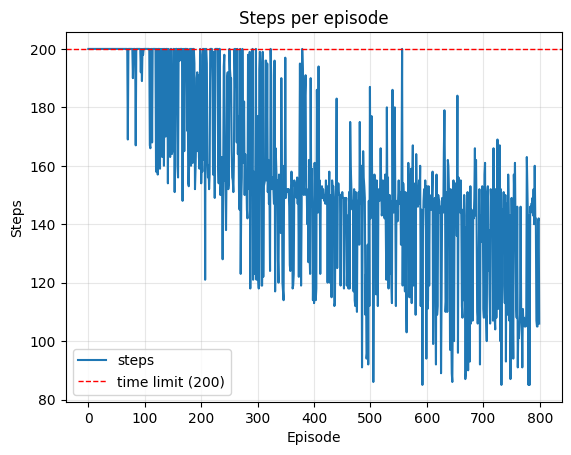

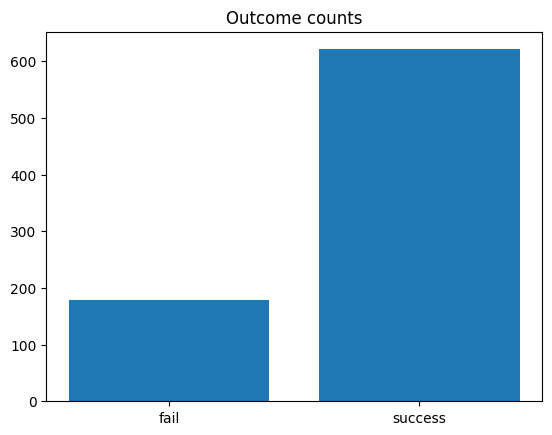

In [32]:
# small explanation of how many steps and overall succes rate for SARSA algorithm

steps = -returns                              # steps per episode
success = returns > -200                      # True if goal reached

overall_success_rate = success.mean()
last100_success_rate = success[-100:].mean()  # more representative
typical_steps_mean  = steps[success].mean() if success.any() else np.nan
typical_steps_median= np.median(steps[success]) if success.any() else np.nan

print(f"Overall success rate: {overall_success_rate*100:.1f}%")
print(f"Last-100-episode success rate: {last100_success_rate*100:.1f}%")
print(f"Typical steps when successful (mean): {typical_steps_mean:.1f}")
print(f"Typical steps when successful (median): {typical_steps_median:.1f}")

# Optional quick visuals
plt.figure()
plt.plot(steps, label="steps")
plt.axhline(200, color='r', ls='--', lw=1, label='time limit (200)')
plt.xlabel("Episode"); plt.ylabel("Steps"); plt.title("Steps per episode")
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure()
plt.bar(["fail","success"], [(~success).sum(), success.sum()])
plt.title("Outcome counts"); plt.show()


- Compare with the random policy baseline:  
  - Does SARSA learn to consistently reach the goal?
    * Yes it does, after save the weights, is demostrated that SARSA learned consistently reach the goal.
  - How many steps does it typically take? 
    * Usually around 130-150 steps

- Short discussion (1–2 paragraphs):  
  - Effect of tile coding parameters (number of tilings, resolution).

The number of tilings controls how much the state space is overlapped. More tilings give the agent a better way to tell similar states apart, it usually improves learning. But if there are too many tilings, updates get smaller and learning becomes slower.

Small resolution (few tiles) makes the value function smoother, it can make the learning faster initially but it may miss important details in the dynamics of the environment. A high resolution (many tiles) provides more accuracy and allows the agent to represent sharp value function changes, but requires more training samples to cover the space, in other words requires more exploration and increases computational cost.